# Emerging Diseases Hazard
This notebook calculates the urban risk index for the Emerging Disease (EMG)
hazard.  The URI calculation has three components: expected loss, social vulnerability, and resilience capacity.  

## 1. Expected Loss
The EMG hazard expected loss (ESL) includes consequences for the following receptors and marginal losses.
 *  People / Deaths

#### 1a. People / Deaths
The NYC 2019 HMP describes the following incidents of emerging infectious disease in NYC from 1981 to 2020: HIV/AIDs, West Nile virus, Chikungunya 
virus, Ebola virus, Zika virus, Tuberculosis resurgence, and Legionnaires' disease. These incidents were used to estimate an approximate 
frequency and average death rate.  Deaths were distributed across tracts by population.  

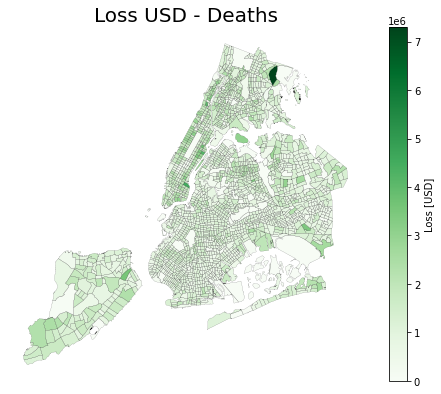

In [1]:
from MISC import params_1 as params
from MISC import utils_1 as utils
from MISC import plotting_1 as plotting
from CLASSES import class_EL_SV_CR_1 as URI
import matplotlib.pyplot as plt
import geopandas as gpd
import os
utils.set_home()
hazard_name = "EMG"

#create ESL class and add loss
path_loss =   params.PATHNAMES.at['ESL_EMG_loss', 'Value']
gdf_loss = gpd.read_file(path_loss)
ESL = URI.ESL(hazard_name = hazard_name)
ESL.add_consequence("Death", "People", gdf_loss)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.consequence["Death"]["map_tract"], 'Loss USD - Deaths')


#### 1b. Expected Loss Total
The total expected losses are the sum of losses from each individual consequence.  

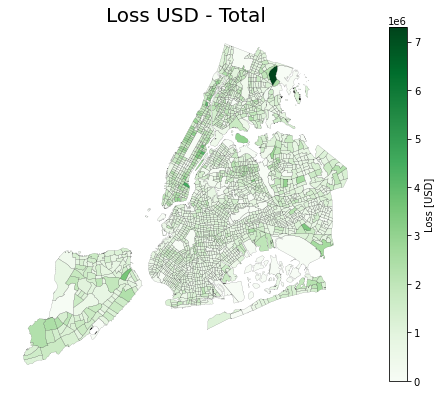

In [2]:
#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\ESL\ESL_{}_tract.shp'.format(hazard_name, hazard_name)
ESL.ESL_map.to_file(path_save)

#plot
plotting.plot_ESL_nb(hazard_name, ESL.ESL_map, 'Loss USD - Total')

## 2. Social Vulnerability Score
The Social Vulnerability is based on the CDC social vulnerability index.  

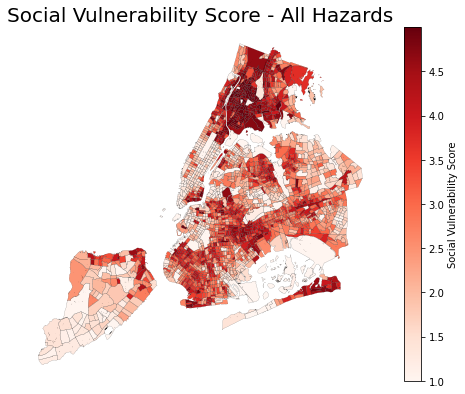

In [3]:
path_SOV = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\SOV\SOV_tract.shp'
gdf_SOV = gpd.read_file(path_SOV)
SOV = URI.SOV(hazard_name = hazard_name, map_tract = gdf_SOV)


#plot
plotting.plot_SOV_nb(SOV.SOV_map)

## 3. Resilience Capacity Score
The Resilience Capacity is the sum of four scores:
- Community Capital
- Mitigation Landscape
- Response Capacity
- Recovery Resources


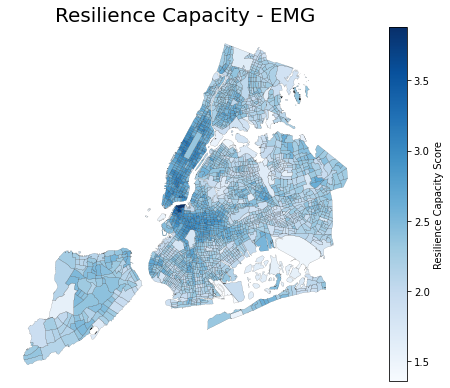

In [4]:
path_RCA = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\\RCA\RCA_{}_tract.shp'.format(hazard_name)
gdf_RCA = gpd.read_file(path_RCA)
RCA = URI.RCA(hazard_name=hazard_name, map_tract=gdf_RCA)
#
plotting.plot_RCA_nb('{}'.format(hazard_name), RCA.RCA_map)

## 4. Calculate URI Score
The URI equation is URI = ESL * SOV / RCA.  The result is clustered into a score of 1 (low) to 5 (high).

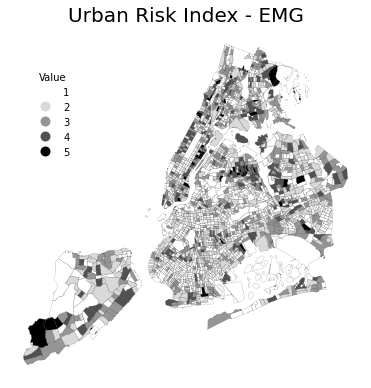

In [5]:
URI_HAZ = URI.URI(hazard_name=hazard_name, ESL=ESL, SOV=SOV, RCA=RCA)
URI_HAZ.calc_URI()

#save result
path_save = params.PATHNAMES.at['OUTPUTS_folder', 'Value'] + r'\URI\URI_{}_tract.shp'.format(hazard_name, hazard_name)
URI_HAZ.URI_map.to_file(path_save)
URI_HAZ.save_URI_FULL()
plotting.plot_URI_nb(hazard_name, URI_HAZ.URI_map)





